In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

# display settings
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# file path 
file_path = "Fractal_Dataset.xlsx"  

# Excel file using openpyxl engine
xls = pd.ExcelFile(file_path, engine="openpyxl")

In [3]:
print("Available Sheets:", xls.sheet_names)

Available Sheets: ['Sheet1']


In [4]:
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0]) 

In [5]:
df.head()

,Department,Date,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,...,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends,Time
0,Brand A,2022-02-05,FY_2022,MAT_2022,55497076.08,0.04,0.02,0,29882443.50,1070.86,...,534418.50,46008.28,2662747.50,11599332.50,815220.96,280464068.50,3861346.49,6779.50,671.94,2022-02-05
1,Brand A,2022-02-12,FY_2022,MAT_2022,57737793.78,0.04,0.01,0,29719511.50,1070.86,...,631368.50,54354.74,2609978.00,13142160.50,923653.55,235058652.50,3236218.13,5110.00,506.47,2022-02-12
2,Brand A,2022-02-19,FY_2022,MAT_2022,54044453.05,0.06,0.01,0,29353173.50,1070.86,...,638092.00,54933.56,2401283.50,12949660.50,910124.32,257480818.00,3544919.88,2842.00,281.68,2022-02-19
3,Brand A,2022-02-26,FY_2022,MAT_2022,55775814.81,0.07,0.02,0,29324354.50,1070.86,...,538643.00,46371.97,2396597.00,12401567.50,871603.41,276892035.00,3812167.79,3031.00,300.41,2022-02-26
4,Brand A,2022-03-05,FY_2022,MAT_2022,58392060.61,0.05,0.02,0,29192688.00,1282.75,...,639628.50,55065.84,2427106.50,8857677.50,622532.75,193081850.50,2658293.91,3395.00,336.49,2022-03-05


In [6]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.") 

Dataset contains 122 rows and 21 columns.


In [7]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['Department', 'Date', 'Year', 'MAT', 'Sales', 'Discount1', 'Discount2', 'Holiday Dummy', 'Total SKU', 'Gasoline Price', 'Average Price', 'Email Clicks', 'Email Spends', 'Organic Search Impressions', 'Modular Video Impressions', 'Modular Video Spends', 'Paid Social Impressions', 'Paid Social Spends', 'Paid Search Impressions', 'Paid Search Spends', 'Time']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Department                  122 non-null    object        
 1   Date                        122 non-null    datetime64[ns]
 2   Year                        122 non-null    object        
 3   MAT                         122 non-null    object        
 4   Sales                       122 non-null    float64       
 5   Discount1                   122 non-null    float64       
 6   Discount2                   122 non-null    float64       
 7   Holiday Dummy               122 non-null    int64         
 8   Total SKU                   122 non-null    float64       
 9   Gasoline Price              122 non-null    float64       
 10  Average Price               122 non-null    float64       
 11  Email Clicks                122 non-null    float64       

In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Department                    0
Date                          0
Year                          0
MAT                           0
Sales                         0
Discount1                     0
Discount2                     0
Holiday Dummy                 0
Total SKU                     0
Gasoline Price                0
Average Price                 0
Email Clicks                  0
Email Spends                  0
Organic Search Impressions    0
Modular Video Impressions     0
Modular Video Spends          0
Paid Social Impressions       0
Paid Social Spends            0
Paid Search Impressions       0
Paid Search Spends            0
Time                          0
dtype: int64


In [10]:
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


In [11]:
# summary statistics for numerical columns
df.describe()

,Date,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends,Time
count,122,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122
mean,2023-04-04 12:00:00,47168172.37,0.05,0.05,0.02,27330389.81,1141.03,18.23,438313.20,37734.54,1973459.22,13422601.82,943363.45,202808305.03,2792204.87,1522.87,150.94,2023-04-04 12:00:00
min,2022-02-05 00:00:00,31585117.79,0.01,0.00,0.00,23775878.00,966.01,17.72,165504.50,14248.34,873421.50,1924107.50,135229.57,69403666.50,955529.19,0.00,0.00,2022-02-05 00:00:00
25%,2022-09-04 18:00:00,44447589.12,0.03,0.01,0.00,25909760.62,1051.75,18.05,316941.62,27285.62,1708428.75,9235255.75,649069.59,139951462.88,1926810.42,0.00,0.00,2022-09-04 18:00:00
50%,2023-04-04 12:00:00,46924177.27,0.04,0.02,0.00,26872104.00,1114.69,18.21,425677.00,36646.68,1943810.75,11919680.50,837735.56,185842151.25,2558619.87,490.00,48.57,2023-04-04 12:00:00
75%,2023-11-02 06:00:00,50472769.97,0.06,0.06,0.00,29251837.12,1186.13,18.41,510419.88,43942.23,2220258.25,17494166.38,1229519.98,272713422.62,3754637.89,2648.62,262.52,2023-11-02 06:00:00
max,2024-06-01 00:00:00,58392060.61,0.18,0.34,1.00,31099047.00,1505.50,18.71,1254225.00,107976.67,3125528.00,37999692.50,2670683.48,368992494.50,5080179.72,10363.50,1027.17,2024-06-01 00:00:00
std,NaN,4904374.46,0.02,0.07,0.13,1986456.70,128.78,0.24,174669.41,15037.35,384406.92,6033648.93,424055.18,78929413.76,1086676.87,2051.58,203.34,NaN


In [12]:
# unique values for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # Display first 10 unique values
    print("-" * 50)

Department: 1 unique values
['Brand A']
--------------------------------------------------
Year: 3 unique values
['FY_2022' 'FY_2023' 'FY_2024']
--------------------------------------------------
MAT: 3 unique values
['MAT_2022' 'MAT_2023' 'MAT_2024']
--------------------------------------------------


In [13]:
# missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


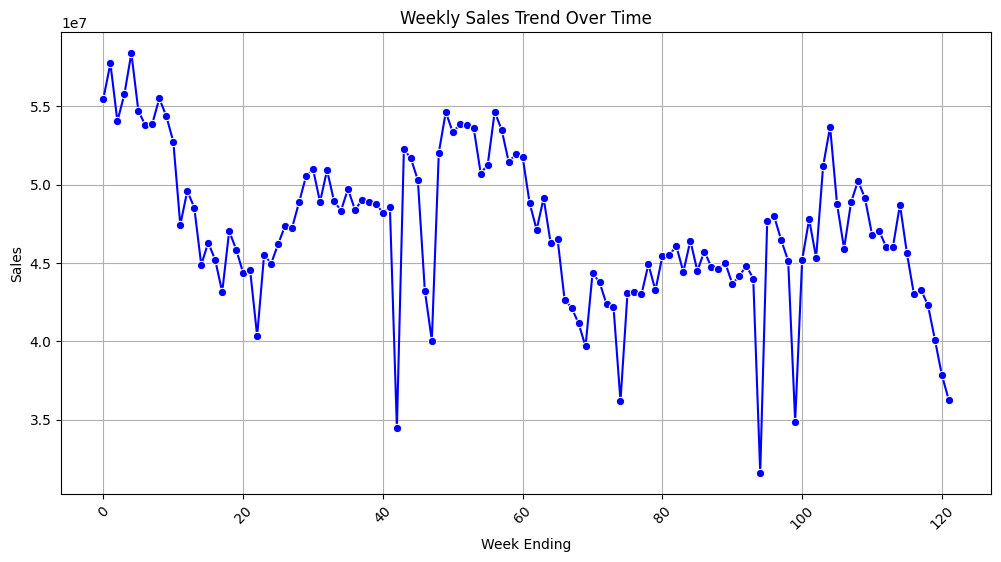

In [14]:
if "Week_Ending" in df.columns:
    df.set_index("Week_Ending", inplace=True)

# Plot Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="Sales", marker="o", color="blue")
plt.xlabel("Week Ending")
plt.ylabel("Sales")
plt.title("Weekly Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

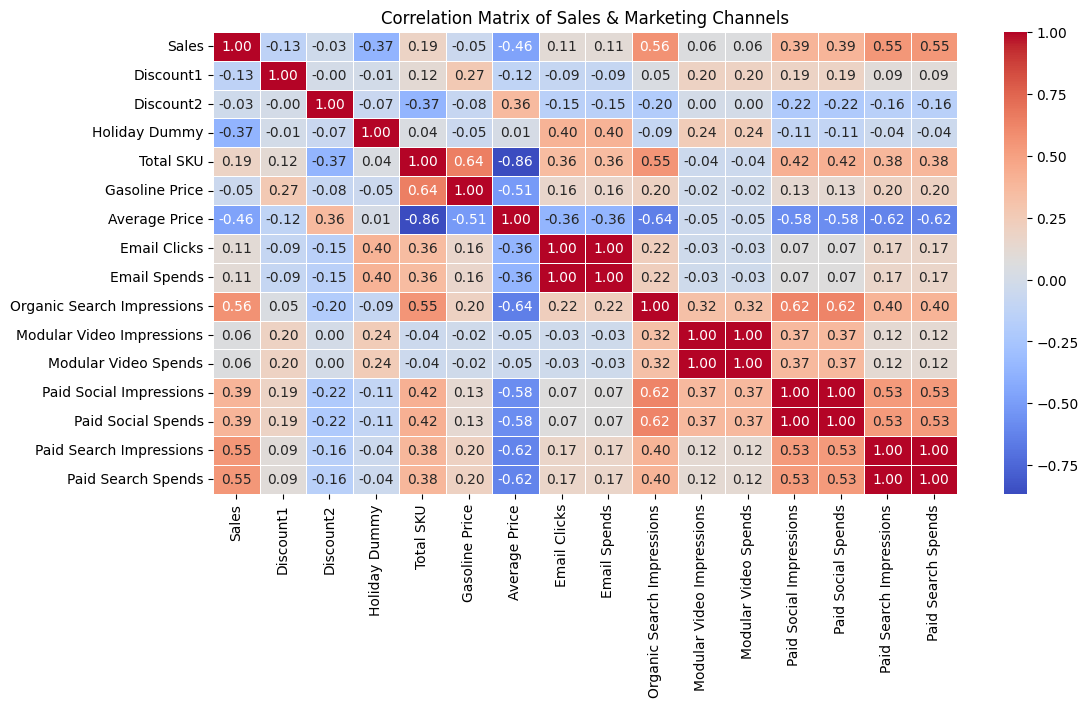

In [15]:
numeric_df = df.select_dtypes(include=['number'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sales & Marketing Channels")
plt.show()

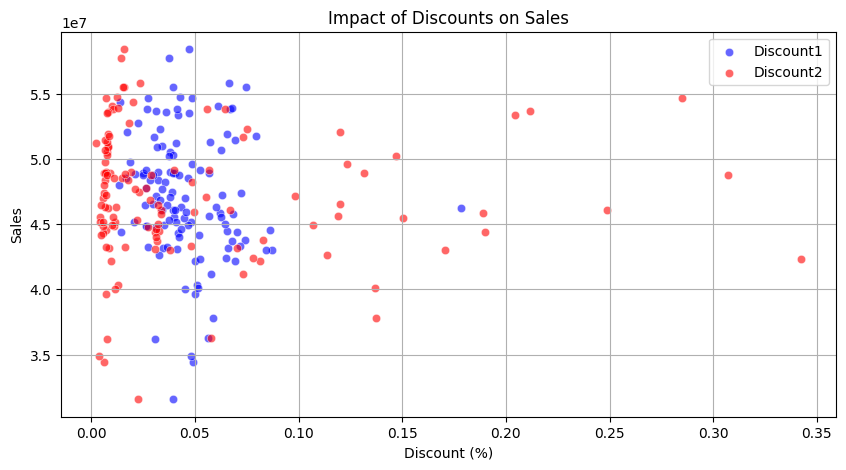

In [16]:
plt.figure(figsize=(10, 5))

# Scatter plot for Discount1 vs Sales
sns.scatterplot(data=df, x="Discount1", y="Sales", alpha=0.6, label="Discount1", color="blue")

# Scatter plot for Discount2 vs Sales
sns.scatterplot(data=df, x="Discount2", y="Sales", alpha=0.6, label="Discount2", color="red")

plt.xlabel("Discount (%)")
plt.ylabel("Sales")
plt.title("Impact of Discounts on Sales")
plt.legend()
plt.grid(True)
plt.show()

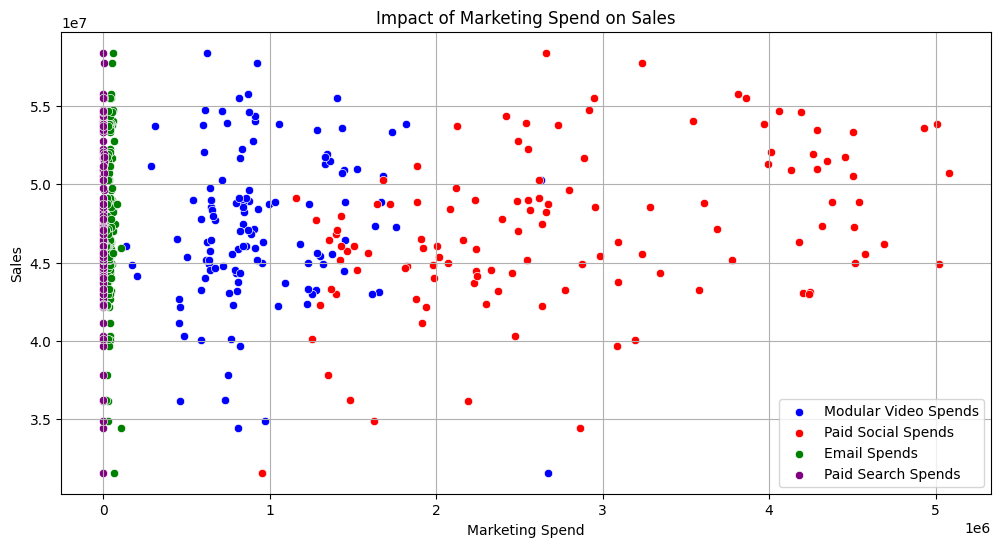

In [17]:
plt.figure(figsize=(12, 6))

# Scatter plots for different marketing spends vs. Sales
sns.scatterplot(data=df, x="Modular Video Spends", y="Sales", label="Modular Video Spends", color="blue")
sns.scatterplot(data=df, x="Paid Social Spends", y="Sales", label="Paid Social Spends", color="red")
sns.scatterplot(data=df, x="Email Spends", y="Sales", label="Email Spends", color="green")
sns.scatterplot(data=df, x="Paid Search Spends", y="Sales", label="Paid Search Spends", color="purple")

plt.xlabel("Marketing Spend")
plt.ylabel("Sales")
plt.title("Impact of Marketing Spend on Sales")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract Year, Month, and Week for analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week

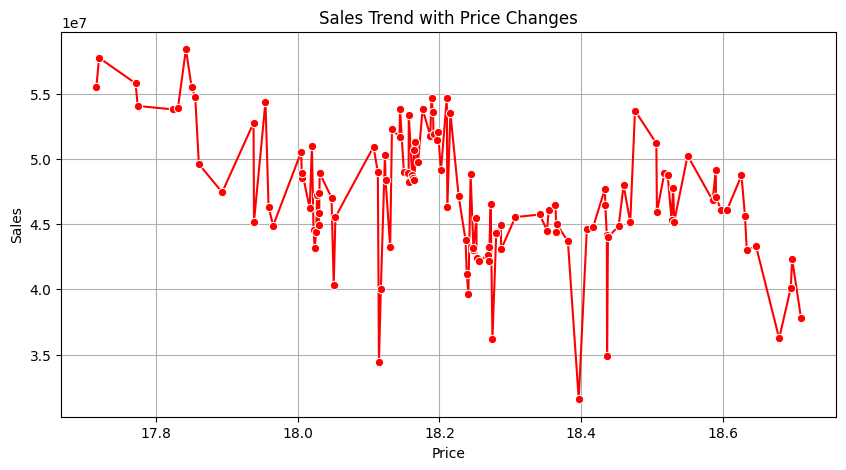

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Average Price", y="Sales", marker="o", color="red")

plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Sales Trend with Price Changes")
plt.grid(True)
plt.show()

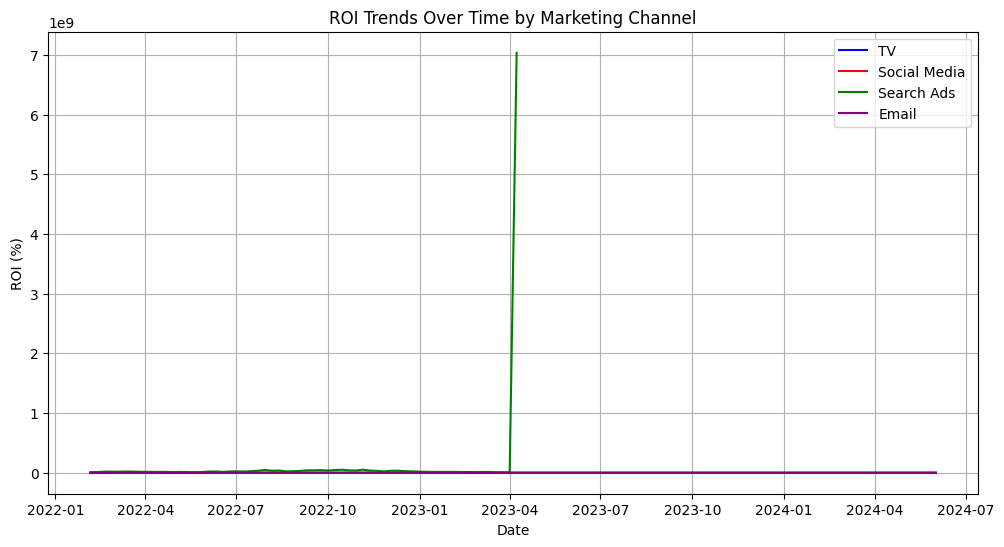

In [20]:
# Creating ROI Calculation for Different Channels
df["ROI_TV"] = (df["Sales"] - df["Modular Video Spends"]) / df["Modular Video Spends"] * 100
df["ROI_Social"] = (df["Sales"] - df["Paid Social Spends"]) / df["Paid Social Spends"] * 100
df["ROI_Search"] = (df["Sales"] - df["Paid Search Spends"]) / df["Paid Search Spends"] * 100
df["ROI_Email"] = (df["Sales"] - df["Email Spends"]) / df["Email Spends"] * 100

plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x="Date", y="ROI_TV", label="TV", color="blue")
sns.lineplot(data=df, x="Date", y="ROI_Social", label="Social Media", color="red")
sns.lineplot(data=df, x="Date", y="ROI_Search", label="Search Ads", color="green")
sns.lineplot(data=df, x="Date", y="ROI_Email", label="Email", color="purple")

plt.xlabel("Date")
plt.ylabel("ROI (%)")
plt.title("ROI Trends Over Time by Marketing Channel")
plt.legend()
plt.grid(True)
plt.show()

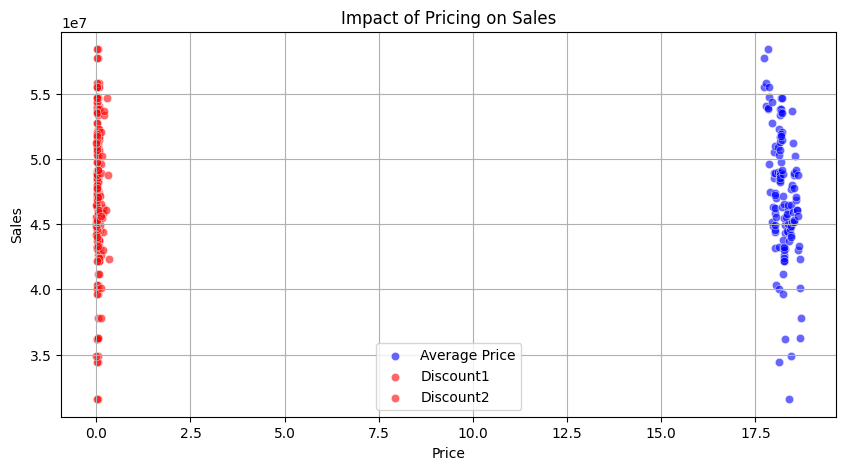

In [21]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=df, x="Average Price", y="Sales", alpha=0.6, color="blue", label="Average Price")
sns.scatterplot(data=df, x="Discount1", y="Sales", alpha=0.6, color="red", label="Discount1")
sns.scatterplot(data=df, x="Discount2", y="Sales", alpha=0.6, color="red", label="Discount2")

plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Impact of Pricing on Sales")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
correlation = df[["Average Price", "Discount1","Discount2" ,"Sales"]].corr()
print(correlation)


               Average Price  Discount1  Discount2  Sales
Average Price           1.00      -0.12       0.36  -0.46
Discount1              -0.12       1.00      -0.00  -0.13
Discount2               0.36      -0.00       1.00  -0.03
Sales                  -0.46      -0.13      -0.03   1.00


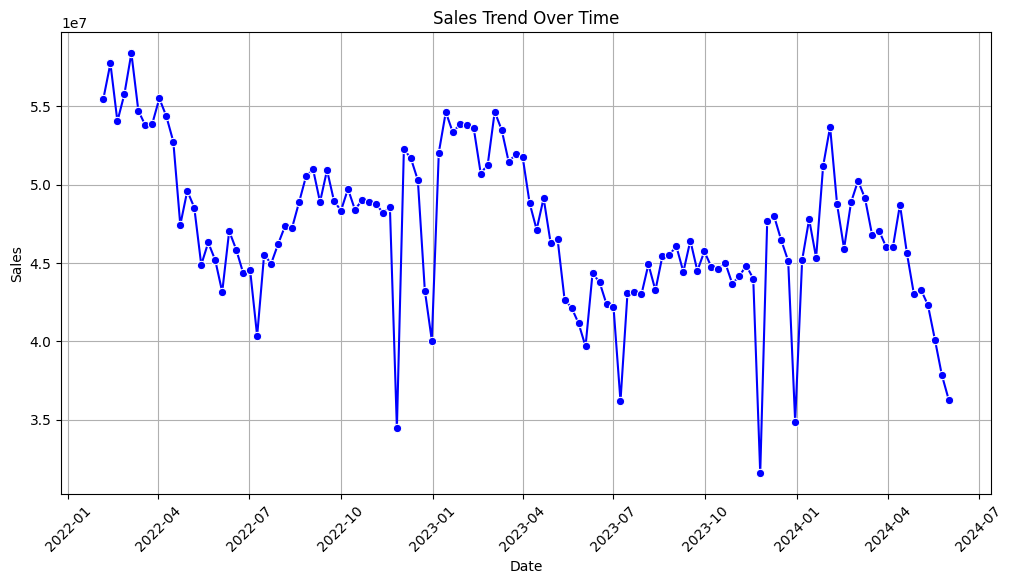

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Sales", marker="o", color="blue")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

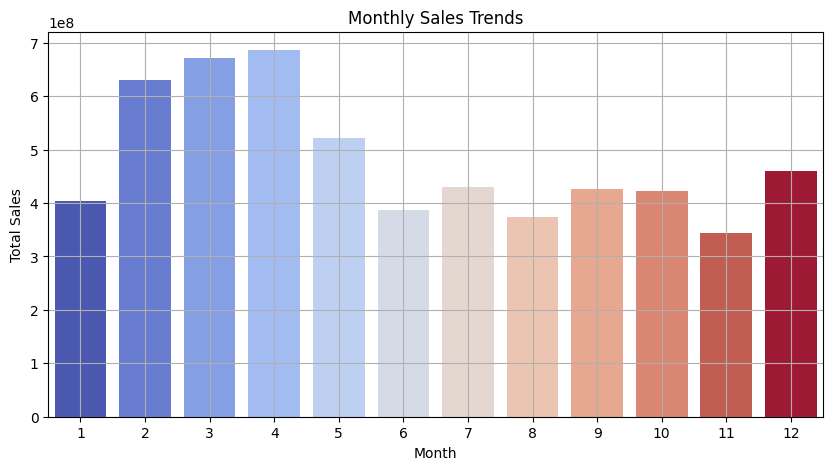

In [26]:
#Monthly sales Trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, palette="coolwarm", legend=False)

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trends")
plt.grid(True)
plt.show()


In [30]:
# marketing spend columns
marketing_channels = ["Modular Video Spends", "Paid Social Spends", "Paid Search Spends"]  # Update with actual column names

# total spend for each channel
total_spend = df[marketing_channels].sum()

# contribution of each channel
sales_contribution = df[marketing_channels].multiply(df["Sales"], axis=0).sum() / df["Sales"].sum()

# ROI for each channel
roi = ((sales_contribution - total_spend) / total_spend) * 100

# ROI values
print(roi)


Modular Video Spends   -99.18
Paid Social Spends     -99.17
Paid Search Spends     -99.12
dtype: float64


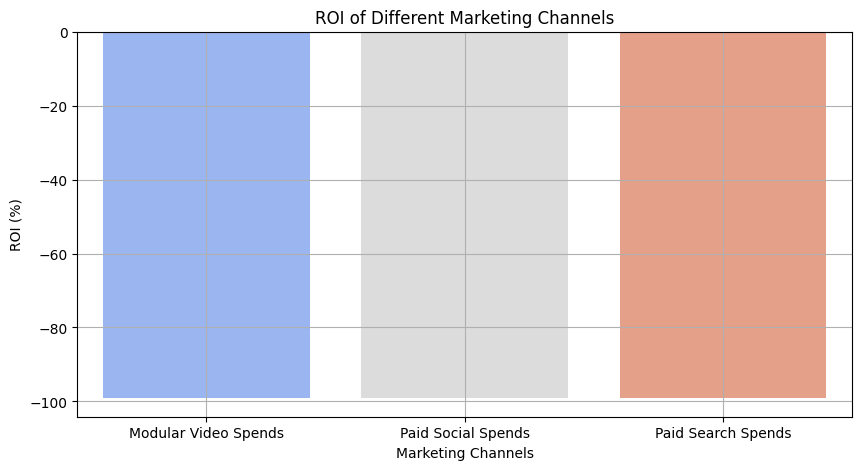

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(x=roi.index, y=roi.values, hue=roi.index, palette="coolwarm", legend=False)

plt.xlabel("Marketing Channels")
plt.ylabel("ROI (%)")
plt.title("ROI of Different Marketing Channels")
plt.grid(True)
plt.show()

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# 'Week_Ending' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [45]:
independent_vars = [
    "Email Spends", "Paid Social Spends", "Paid Search Spends",
    "Modular Video Spends", "Discount1", "Discount2",
    "Gasoline Price", "Holiday Dummy"
]

In [46]:
# multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_data)


Variance Inflation Factor (VIF) Analysis:
                Feature   VIF
0          Email Spends  9.81
1    Paid Social Spends 13.08
2    Paid Search Spends  2.16
3  Modular Video Spends  7.95
4             Discount1  6.98
5             Discount2  1.61
6        Gasoline Price 23.17
7         Holiday Dummy  1.45


In [47]:
# Droping highly collinear variables 
reduced_vars = [
    "Email Spends", "Paid Search Spends", "Modular Video Spends", 
    "Discount1", "Discount2", "Holiday Dummy"
]
X_reduced = df[reduced_vars]

In [48]:
# dependent variable
y = df["Sales"]
X_reduced = sm.add_constant(X_reduced)  # Adding constant term

In [49]:
# OLS Regression Model
model = sm.OLS(y, X_reduced).fit()
print("\nOLS Regression Results:")
print(model.summary())


OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     19.63
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.13e-15
Time:                        00:57:42   Log-Likelihood:                -2009.1
No. Observations:                 122   AIC:                             4032.
Df Residuals:                     115   BIC:                             4052.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const  

In [50]:
# Compute Elasticity
coefficients = model.params
means = df[reduced_vars].mean()
sales_mean = df["Sales"].mean()
elasticities = (coefficients[1:] * means) / sales_mean

In [51]:
# Display Elasticity Values
elasticity_df = pd.DataFrame({"Feature": elasticities.index, "Elasticity": elasticities.values})
print("\nElasticity of Marketing Variables:")
print(elasticity_df)


Elasticity of Marketing Variables:
                Feature  Elasticity
0          Email Spends        0.06
1    Paid Search Spends        0.04
2  Modular Video Spends        0.04
3             Discount1       -0.04
4             Discount2        0.00
5         Holiday Dummy       -0.01


In [52]:
# Optimize Marketing Budget Allocation
marketing_vars = ["Email Spends", "Paid Search Spends", "Modular Video Spends"]
current_spends = df[marketing_vars].mean()
total_spend = current_spends.sum()

In [54]:
# copy of the DataFrame
filtered_elasticity = filtered_elasticity.copy()

# Now apply the transformation
filtered_elasticity["Absolute Elasticity"] = np.abs(filtered_elasticity["Elasticity"])


In [56]:
# optimized budget allocation
budget_optimization = pd.DataFrame({
    "Marketing Channel": marketing_vars,
    "Current Spend": current_spends.values,
    "Optimized Spend": optimized_spends.values
})

print("\nOptimized Marketing Budget Allocation:")
print(budget_optimization)


Optimized Marketing Budget Allocation:
      Marketing Channel  Current Spend  Optimized Spend
0          Email Spends       37734.54        420271.10
1    Paid Search Spends         150.94        288122.78
2  Modular Video Spends      943363.45        272855.04
